In [8]:
# !pip install transformers
# !pip install matplotlib
# !pip install tiktoken
# !pip install protobuf
# !pip install sentencepiece

In [9]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [10]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed', use_fast=False)
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-printed')

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.48.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 1024,
  "decode

In [11]:
def ocr_detect(path):
    image = Image.open(path).convert("RGB")

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis labels
    plt.show()
    
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

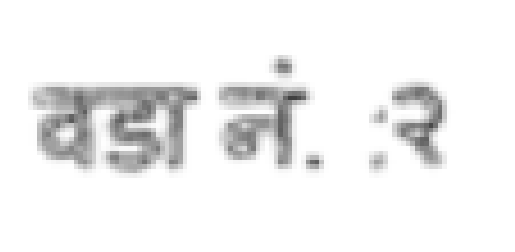

GSTAT. R


In [12]:
print(ocr_detect("ocrdataset/TestSamples/t2.png"))